# EDA：視覺化更多圖表的技巧（作業說明欄請勿調成編輯模式，以防下方示意圖片無法使用）

## 作業程式碼
本作業將請學員完成以下要求：
1. 請至 Kaggle 平台找尋欲探索的資料集，進行本次作業。
2. 請參考圖一的 2 x 3 子圖配置，分別使用 plt.subplot、plt.subplots() 與 plt.add_subplot() 完成視覺化
3. 請參考圖二的不規則子圖配置以及相對應的圖表種類，利用 plt.GridSpec() 完成視覺化。

## 匯入套件

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## 匯入資料與簡單的資料探索

In [2]:
import os

# 輸入資料
folder = './data/'
path = os.path.join(folder, 'all_video_games.csv')

raw_data = pd.read_csv(path)

# 探索每個資料欄位與遺失值概況
raw_data.isnull().sum()

Title                   21
Release Date            64
Developer              138
Publisher              138
Genres                  21
Genres Splitted         21
Product Rating        3050
User Score            2341
User Ratings Count    2756
Platforms Info           0
dtype: int64

In [3]:
# 為求學習方便，在此先將有遺失值的資料剔除掉
data = raw_data.copy()
data = data.dropna()
data.isnull().sum()

Title                 0
Release Date          0
Developer             0
Publisher             0
Genres                0
Genres Splitted       0
Product Rating        0
User Score            0
User Ratings Count    0
Platforms Info        0
dtype: int64

In [4]:
data['Release Date'] = pd.to_datetime(data['Release Date'], format='%m/%d/%Y')
data['Release Year'] = data['Release Date'].dt.year

data.head()

,Title,Release Date,Developer,Publisher,Genres,Genres Splitted,Product Rating,User Score,User Ratings Count,Platforms Info,Release Year
3,Gothic 3,2006-11-14,Piranha Bytes,Aspyr,Western RPG,"['Western', 'RPG']",Rated T For Teen,7.5,832.0,"[{'Platform': 'PC', 'Platform Metascore': '63'...",2006
5,Guitar Hero III: Legends of Rock,2007-10-28,Neversoft Entertainment,RedOctane,Rhythm,['Rhythm'],Rated T For Teen,8.4,144.0,"[{'Platform': 'Wii', 'Platform Metascore': '86...",2007
7,Xenoraid,2016-11-08,10tons,10tons,Vertical Shoot-'Em-Up,"['Vertical', ""Shoot-'Em-Up""]",Rated E +10 For Everyone +10,6.2,6.0,"[{'Platform': 'PlayStation 4', 'Platform Metas...",2016
8,The Sims: Livin' Large,2000-08-27,Maxis,EA Games,Virtual Life,"['Virtual', 'Life']",Rated T For Teen,7.7,20.0,"[{'Platform': 'PC', 'Platform Metascore': '82'...",2000
12,"Warhammer 40,000: Space Marine",2011-09-06,Relic Entertainment,THQ,Third Person Shooter,"['Third', 'Person', 'Shooter']",Rated M For Mature,7.8,259.0,"[{'Platform': 'PC', 'Platform Metascore': '74'...",2011


## 使用 Subplot 建立子圖

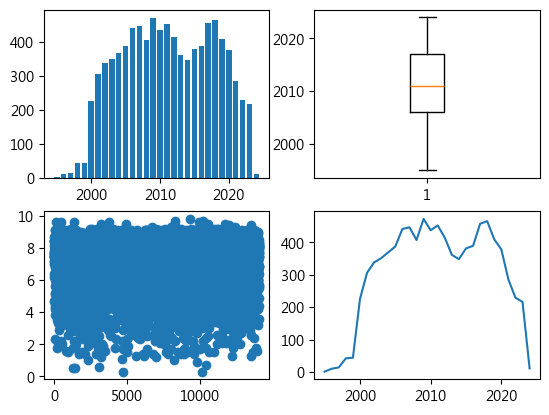

In [5]:
release_data = data['Release Year'].value_counts().sort_index()

# Set font
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']

fig = plt.figure()
plt.subplot(2, 2, 1)
plt.bar(x=release_data.index,
        height=release_data.values)

plt.subplot(2, 2, 2)
plt.boxplot(data['Release Year'])

plt.subplot(2, 2, 3)
plt.scatter(data.index, data['User Score'])

plt.subplot(2, 2, 4)
plt.plot(release_data.index, release_data.values)

plt.show()

## 使用 Subplots 建立子圖

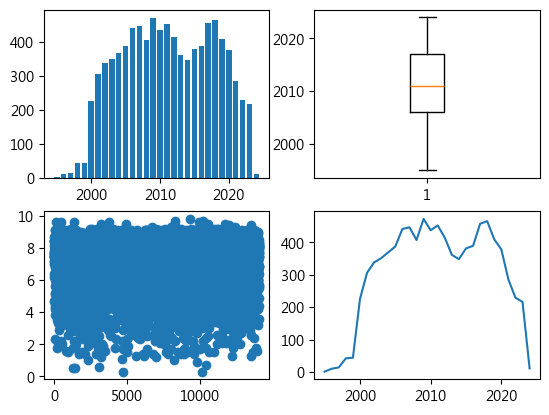

In [6]:
# Reset fig
fig.clear()

fig, ax = plt.subplots(nrows=2, ncols=2)

ax[0][0].bar(x=release_data.index, height=release_data.values)
ax[0][1].boxplot(data['Release Year'])
ax[1][0].scatter(data.index, data['User Score'])
ax[1][1].plot(release_data.index, release_data.values)

plt.show()

## 使用 add_subplot 建立子圖

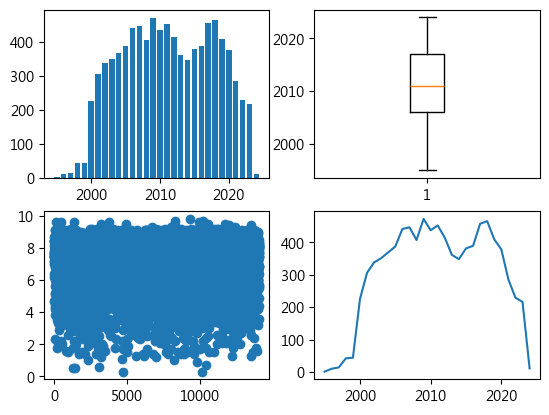

In [7]:
# Reset fig
fig.clear()

fig = plt.figure()

fig.add_subplot(2, 2, 1)
plt.bar(x=release_data.index, height=release_data.values)

fig.add_subplot(2, 2, 2)
plt.boxplot(data['Release Year'])

fig.add_subplot(2, 2, 3)
plt.scatter(data.index, data['User Score'])

fig.add_subplot(2, 2, 4)
plt.plot(release_data.index, release_data.values)

plt.show()

## 使用 GridSpec 建置不規則排列

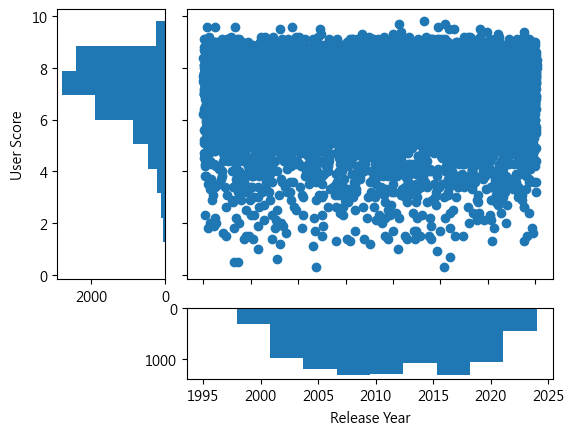

In [8]:
# Reset fig
fig.clear()

fig = plt.figure()
grid = plt.GridSpec(4, 4, wspace=0.2, hspace=0.4)

# 決定散佈圖會包含哪些子圖
main_scatter = plt.subplot(grid[:-1, 1:])
main_scatter.scatter(data.index, data['User Score'])

# 將散佈圖的 X, Y 軸上的數字刪除掉
main_scatter.set_xticklabels('')
main_scatter.set_yticklabels('')

y_hist = plt.subplot(grid[:-1, 0])
y_hist.hist(data['User Score'], orientation='horizontal')
y_hist.invert_xaxis()  # 將直方圖結果由左邊翻轉至右邊
y_hist.set_ylabel('User Score')

x_hist = plt.subplot(grid[-1, 1:])
x_hist.hist(data['Release Year'])
x_hist.invert_yaxis()  # 將直方圖結果由下方翻轉至上方
x_hist.set_xlabel('Release Year')

plt.show()